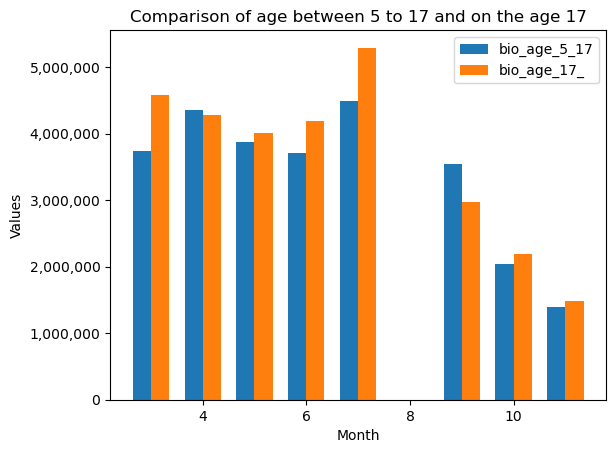

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load data
df = pd.read_csv('C:\\Users\\srees\\Videos\\aadha online\\biometrics_cleaned.csv')

# Data
x = df['month']
y1 = df.iloc[:, -2]
y2 = df.iloc[:, -1]

width = 0.35

# Create plot
plt.figure()
plt.bar(x - width/2, y1, width, label=y1.name)
plt.bar(x + width/2, y2, width, label=y2.name)

# Format Y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Comparison of age between 5 to 17 and on the age 17')
plt.legend()

plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter

In [6]:
df = pd.read_csv("biometrics_cleaned_backup.csv")
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')
df = df.dropna(subset=['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)
df['total_bio'] = df['bio_age_5_17'] + df['bio_age_17_']
df['age_ratio'] = df['bio_age_17_'] / df['bio_age_5_17'].replace(0, 1)

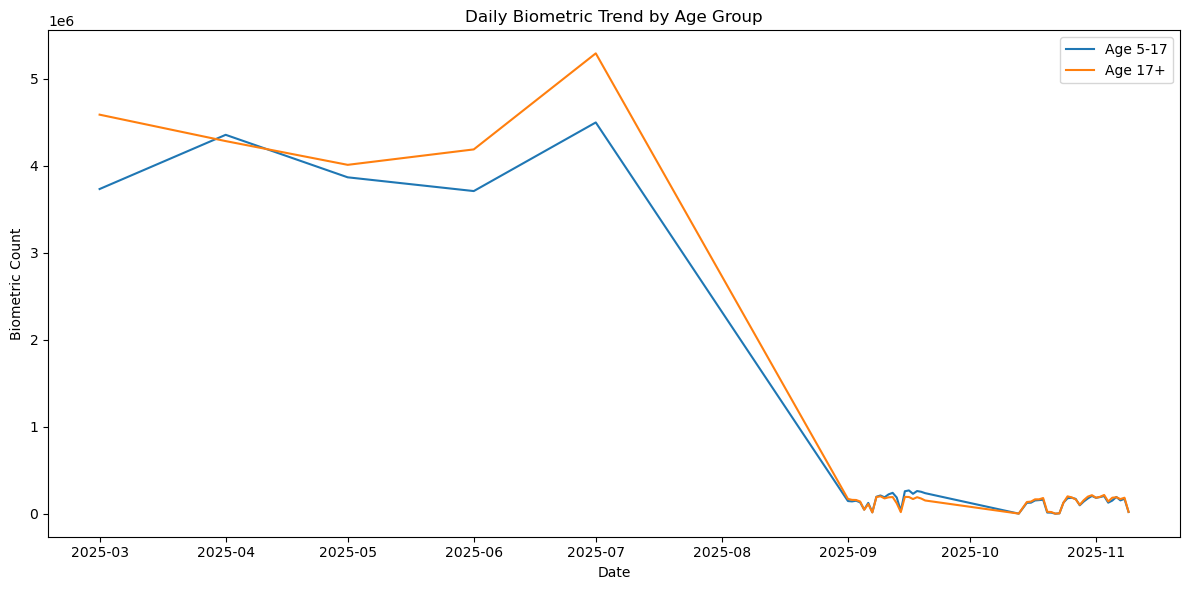

In [7]:
daily = df.groupby('date')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily['date'], daily['bio_age_5_17'], label='Age 5-17')
plt.plot(daily['date'], daily['bio_age_17_'], label='Age 17+')
plt.title("Daily Biometric Trend by Age Group")
plt.xlabel("Date")
plt.ylabel("Biometric Count")
plt.legend()
plt.tight_layout() 
plt.show()

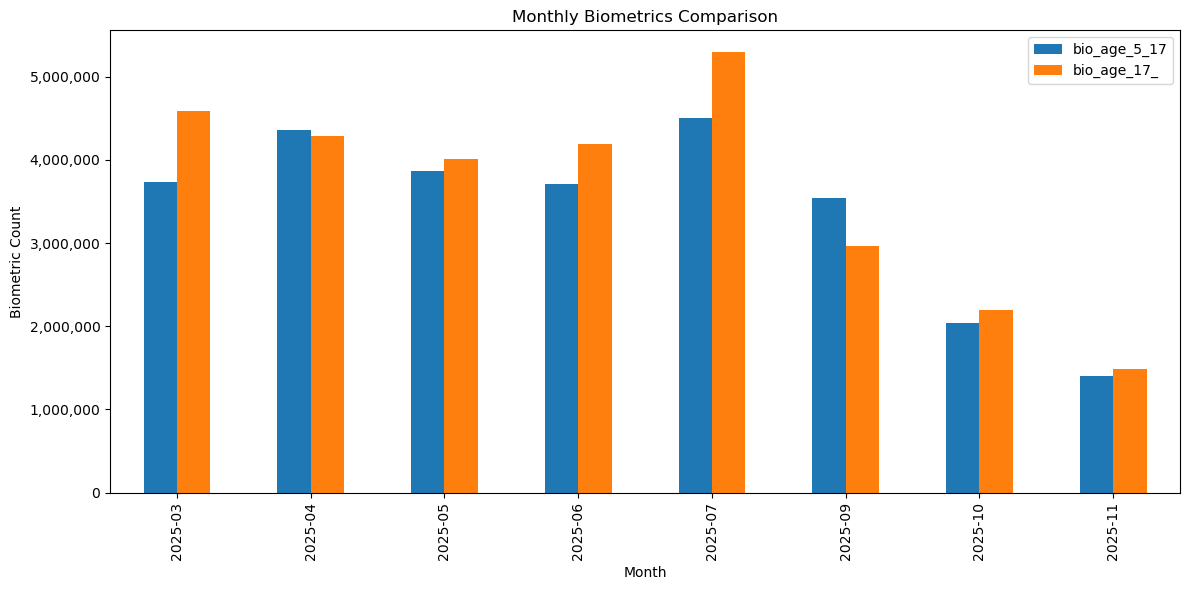

In [9]:
monthly = df.groupby('month')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
monthly.set_index('month').plot(kind='bar', figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title("Monthly Biometrics Comparison")
plt.xlabel("Month")
plt.ylabel("Biometric Count")
plt.tight_layout()
plt.show()


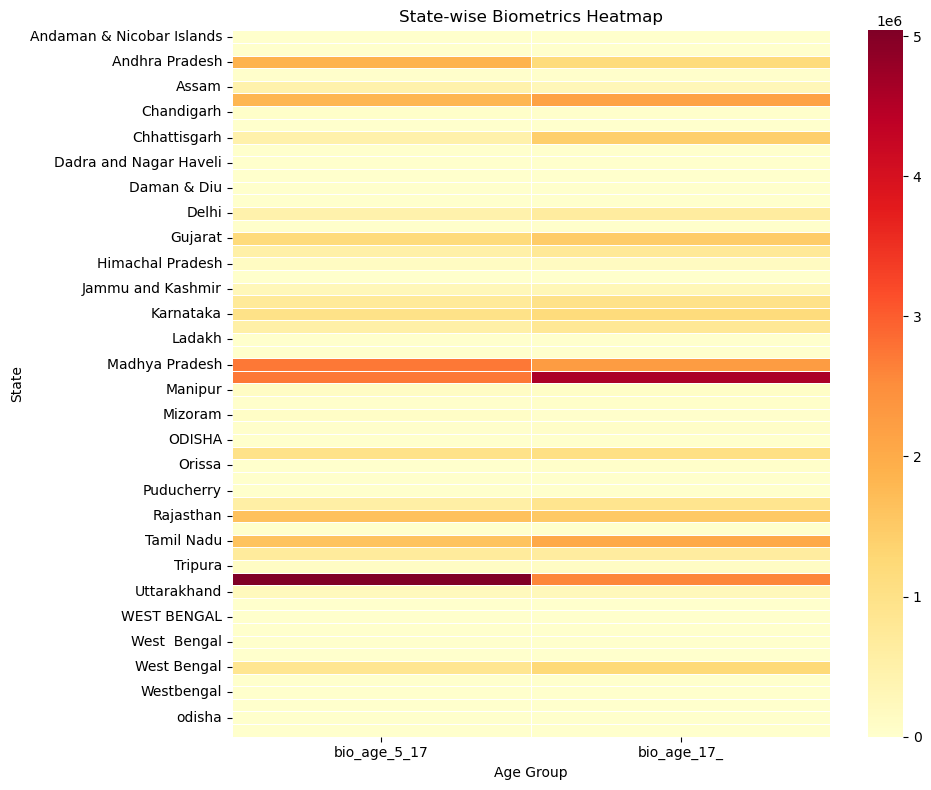

In [10]:
state_data = df.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum()

plt.figure(figsize=(10, 8))
sns.heatmap(state_data, cmap="YlOrRd", linewidths=0.5)
plt.title("State-wise Biometrics Heatmap")
plt.xlabel("Age Group")
plt.ylabel("State")
plt.tight_layout()
plt.show()

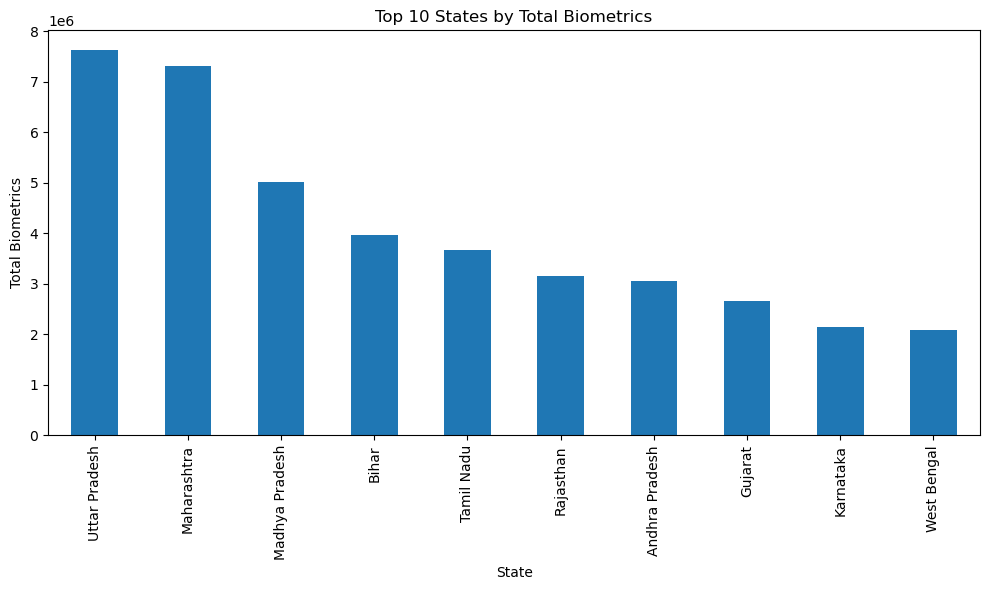

In [11]:
top_states = df.groupby('state')['total_bio'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title("Top 10 States by Total Biometrics")
plt.xlabel("State")
plt.ylabel("Total Biometrics")
plt.tight_layout()
plt.show()

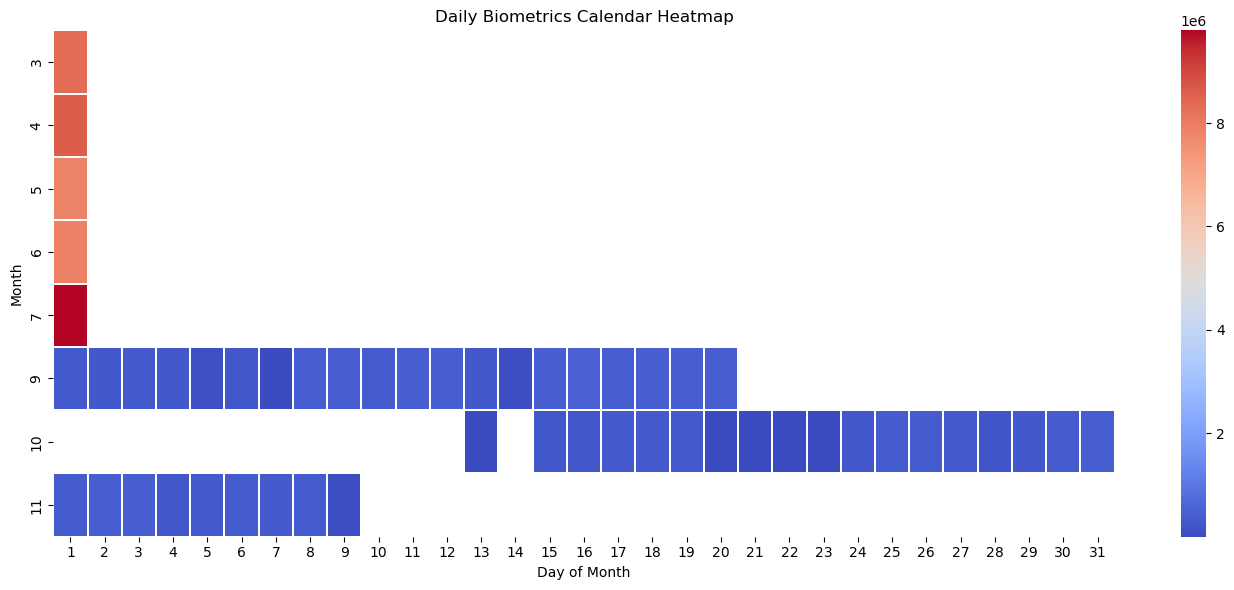

In [12]:
calendar_data = df.groupby('date')['total_bio'].sum().reset_index()
calendar_data['day'] = calendar_data['date'].dt.day
calendar_data['month_num'] = calendar_data['date'].dt.month

pivot = calendar_data.pivot(index="month_num", columns="day", values="total_bio")

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap="coolwarm", linewidths=0.2)
plt.title("Daily Biometrics Calendar Heatmap")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

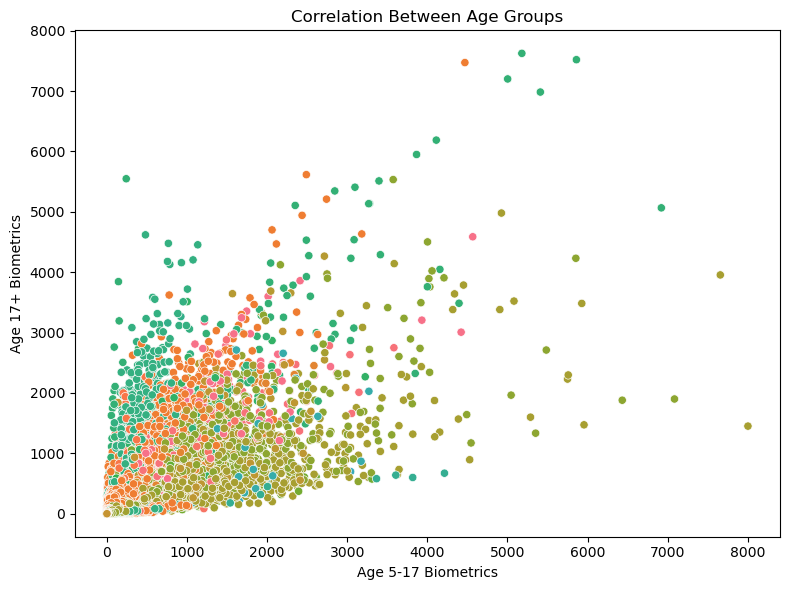

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='bio_age_5_17',
    y='bio_age_17_',
    hue='state',
    data=df,
    legend=False
)
plt.title("Correlation Between Age Groups")
plt.xlabel("Age 5-17 Biometrics")
plt.ylabel("Age 17+ Biometrics")
plt.tight_layout()
plt.show()

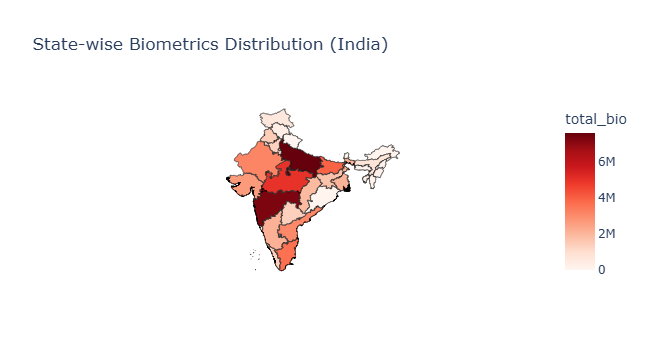

In [14]:
map_data = df.groupby('state')['total_bio'].sum().reset_index()

fig = px.choropleth(
    map_data,
    geojson="https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson",
    featureidkey="properties.NAME_1",
    locations="state",
    color="total_bio",
    color_continuous_scale="Reds",
    title="State-wise Biometrics Distribution (India)"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()